In [202]:
import pickle
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [203]:
with open('train_image.pkl', 'rb') as f:
    train_image = pickle.load(f)
    
with open('train_label.pkl', 'rb') as f:
    train_label = pickle.load(f)
    
with open('test_image.pkl', 'rb') as f:
    test_image = pickle.load(f)

In [204]:
type(train_image)

list

In [205]:
len(train_image)

8000

In [206]:
len(train_image[0])

784

In [207]:
img = train_image[0]
img = np.array(img).reshape(28, 28)

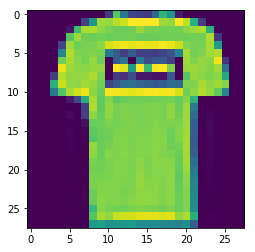

In [208]:
imshow(np.asarray(img))

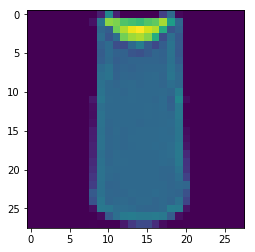

In [209]:
img = train_image[1]
img = np.array(img).reshape(28, 28)
imshow(np.asarray(img))

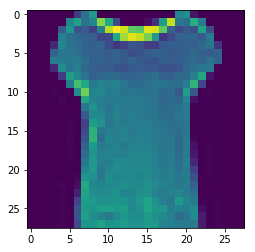

In [210]:
img = train_image[100]
img = np.array(img).reshape(28, 28)
imshow(np.asarray(img))

In [211]:
train_image = np.array(train_image)

In [212]:
train_image.shape

(8000, 784)

In [213]:
type(train_image)

numpy.ndarray

In [214]:
type(train_label)

list

In [215]:
len(train_label)

8000

In [216]:
train_label = np.array(train_label)

In [217]:
type(train_label)

numpy.ndarray

In [218]:
type(test_image)

list

In [219]:
len(test_image)

2000

In [220]:
test_image = np.array(test_image)

In [221]:
test_image.shape

(2000, 784)

In [222]:
#normalization
train_image = train_image.astype(np.float32)
train_image/=255

In [223]:
test_image = test_image.astype(np.float32)
test_image/=255

In [224]:
# # shuffling data
# rng_state = np.random.get_state()
# np.random.shuffle(train_image)
# np.random.set_state(rng_state)
# np.random.shuffle(train_label)

In [237]:
x_train, x_test, y_train, y_test = train_test_split(train_image, train_label, test_size=0.20, random_state=42)

In [238]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6400, 784)
(1600, 784)
(6400,)
(1600,)


In [241]:
# for i in range(len(y_train)):
#     if y_train[i] == 2:
#         y_train[i] = 1
#     elif y_train[i] ==3:
#         y_train[i] = 2
#     elif y_train[i] == 6:
#         y_train[i] = 3
        
# for i in range(len(y_test)):
#     if y_test[i] == 2:
#         y_test[i] = 1
#     elif y_test[i] ==3:
#         y_test[i] = 2
#     elif y_test[i] == 6:
#         y_test[i] = 3

In [240]:
with open('x_train.pkl', 'wb') as file:
    pickle.dump(x_train, file)
with open('x_test.pkl', 'wb') as file:
    pickle.dump(x_test, file)
with open('y_train.pkl', 'wb') as file:
    pickle.dump(y_train, file)
with open('y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)

In [192]:
def compute_accuracy(predicted_output, expected_output):
    
    rows = expected_output.shape[0]
    for i in [0, 2, 3, 6]:
        count_expected = 0
        count_predicted = 0
        for index in range(rows):
            if(expected_output[index] == i):
                count_expected+=1
            if(expected_output[index] == i and predicted_output[index] == expected_output[index]):
                count_predicted+=1
        print('percentage accuracy for: ', i)
        print((float(count_predicted)/count_expected)*100)

In [175]:
def plot_confusion_matrix(mat, labels):
    df_cm = pd.DataFrame(mat, index = labels,
                  columns = labels)
    plt.figure(figsize = (6,4))
    sn.heatmap(df_cm, annot=True)

In [129]:
logistic_regression_model = LogisticRegression(multi_class='ovr')

In [130]:
logistic_regression_model.fit(x_train, y_train)

c:\users\shishir\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [131]:
predicted_op = logistic_regression_model.predict(x_train)

In [132]:
predicted_op

array([3, 2, 0, ..., 2, 2, 2])

In [136]:
train_f1 = f1_score(y_train, predicted_op, average=None)

In [145]:
print('train f1 score: ', train_f1)

train f1 score:  [0.87530713 0.88717156 0.94402985 0.79405108]


In [140]:
train_accuracy = accuracy_score(y_train, predicted_op)
print('train accuracy: ', train_accuracy)

train accuracy:  0.8759375


In [141]:
predicted_op_test = logistic_regression_model.predict(x_test)

In [142]:
predicted_op_test

array([0, 0, 6, ..., 2, 2, 3])

In [144]:
test_f1 = f1_score(y_test, predicted_op_test, average=None)
print('test f1 score: ', test_f1)

test f1 score:  [0.81418093 0.8453106  0.89081886 0.67549669]


In [147]:
test_accuracy = accuracy_score(y_test, predicted_op_test)
print('test accuracy: ', test_accuracy)

test accuracy:  0.80875


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       397
           2       0.83      0.87      0.85       401
           3       0.89      0.90      0.89       401
           6       0.72      0.64      0.68       401

   micro avg       0.81      0.81      0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.81      0.81      1600



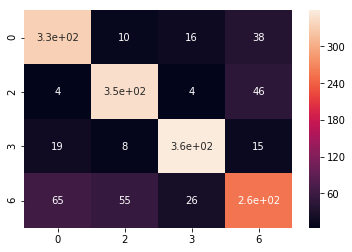

In [184]:
target_names=['0', '2', '3' ,'6']
print(classification_report(y_test, predicted_op_test, target_names=target_names))
cm = confusion_matrix(y_test, predicted_op_test)
plot_confusion_matrix(cm, target_names)

In [194]:
print('test accuracy for each class: ')
compute_accuracy(predicted_op_test, y_test)

test accuracy for each class: 
percentage accuracy for:  0
83.87909319899244
percentage accuracy for:  2
86.53366583541147
percentage accuracy for:  3
89.52618453865337
percentage accuracy for:  6
63.591022443890274


In [148]:
logistic_regression_model_l1 = LogisticRegression(penalty='l1',multi_class='ovr')

In [149]:
logistic_regression_model_l1.fit(x_train, y_train)

c:\users\shishir\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [150]:
predicted_op_l1 = logistic_regression_model_l1.predict(x_train)

In [151]:
train_f1_l1 = f1_score(y_train, predicted_op_l1, average=None)
print('train f1 score using l1: ', train_f1_l1)

train f1 score using l1:  [0.86327406 0.87841191 0.93304402 0.77202073]


In [152]:
train_accuracy_l1 = accuracy_score(y_train, predicted_op_l1)
print('train accuracy using l1 : ', train_accuracy_l1)

train accuracy using l1 :  0.86265625


In [153]:
predicted_op_test_l1 = logistic_regression_model_l1.predict(x_test)

In [154]:
test_f1_l1 = f1_score(y_test, predicted_op_test_l1, average=None)
print('test f1 score: ', test_f1_l1)

test f1 score:  [0.81517748 0.85090909 0.90186335 0.67729084]


In [155]:
test_accuracy_l1 = accuracy_score(y_test, predicted_op_test_l1)
print('test accuracy: ', test_accuracy_l1)

test accuracy:  0.81375


In [163]:
np.unique(y_train)

array([0, 2, 3, 6])

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       397
           2       0.83      0.88      0.85       401
           3       0.90      0.91      0.90       401
           6       0.72      0.64      0.68       401

   micro avg       0.81      0.81      0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.81      0.81      1600



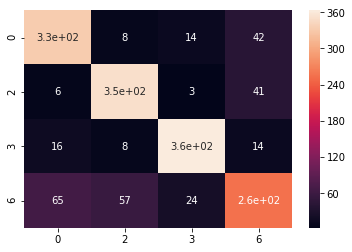

In [183]:
target_names=['0', '2', '3' ,'6']
print(classification_report(y_test, predicted_op_test_l1, target_names=target_names))
cm = confusion_matrix(y_test, predicted_op_test_l1)
plot_confusion_matrix(cm, target_names)

In [195]:
print('test accuracy for each class: ')
compute_accuracy(predicted_op_test_l1, y_test)

test accuracy for each class: 
percentage accuracy for:  0
83.87909319899244
percentage accuracy for:  2
87.53117206982543
percentage accuracy for:  3
90.52369077306733
percentage accuracy for:  6
63.591022443890274


In [186]:
logistic_regression_model_l2 = LogisticRegression(penalty='l2',multi_class='ovr')
logistic_regression_model_l2.fit(x_train, y_train)

c:\users\shishir\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

test accuracy:  0.80875
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       397
           2       0.83      0.87      0.85       401
           3       0.89      0.90      0.89       401
           6       0.72      0.64      0.68       401

   micro avg       0.81      0.81      0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.81      0.81      1600



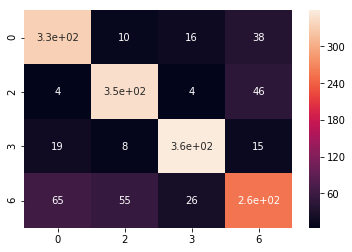

In [188]:
predicted_op_test_l2 = logistic_regression_model_l2.predict(x_test)
test_accuracy_l2 = accuracy_score(y_test, predicted_op_test_l2)
print('test accuracy: ', test_accuracy_l2)
target_names=['0', '2', '3' ,'6']
print(classification_report(y_test, predicted_op_test_l2, target_names=target_names))
cm = confusion_matrix(y_test, predicted_op_test_l2)
plot_confusion_matrix(cm, target_names)

In [196]:
print('test accuracy for each class: ')
compute_accuracy(predicted_op_test_l2, y_test)

test accuracy for each class: 
percentage accuracy for:  0
83.87909319899244
percentage accuracy for:  2
86.53366583541147
percentage accuracy for:  3
89.52618453865337
percentage accuracy for:  6
63.591022443890274
